# Cryptocurrencies Community Engagement Analysis

The goal of this notebook is to analyse the twitter activity of the crypto ecosystem on selected cryptocurrencies to gain insights on the community engagement

# About the dataset

Let's understand what is the data and what it looks like.

In [1]:
import pandas as pd
#Read in the tweets dataset
tweets = pd.read_csv("Dataset/Twitter_tophashtags_crypto.csv")
print(tweets)

                            tweetDate  \
0      Wed May 11 01:38:14 +0000 2022   
1      Thu Apr 28 05:51:55 +0000 2022   
2      Tue May 10 16:36:13 +0000 2022   
3      Wed May 11 08:21:35 +0000 2022   
4      Tue May 10 21:32:03 +0000 2022   
...                               ...   
11336  Sat May 14 14:19:57 +0000 2022   
11337  Sat May 14 19:30:36 +0000 2022   
11338  Sat May 14 19:51:22 +0000 2022   
11339  Sun May 15 01:15:56 +0000 2022   
11340  Sat May 14 19:29:46 +0000 2022   

                                                 content  \
0      🎉 GIVEAWAY 🎉\n\nWe Partnered Up with @Fightbac...   
1      Elon yapmış yapacağını yine. Favlayınca tesla ...   
2      #BITCOIN ARE YOU READY FOR THE HUGE PUMP ????\...   
3      Same month last year\n\n#btc #cryptocrash #Bit...   
4      Enjoy the dump boys \nWhile am helping @crypto...   
...                                                  ...   
11336  Time for a #weekend #NFTGiveaway - I will be g...   
11337  ✏️  Endless prospect

In [2]:
#Example of a tweet
print(tweets["content"].iloc[20])

💥BREAKING: El Salvador just bought $15.4m #Bitcoin 
Another 500 #BTC off the market!🙌


In [3]:
#Example of a tweet related to a specific hashtag
print(tweets[tweets["query"] == "#SOL"]['content'].iloc[50])

Just picked up these cuties! @SleepySachis NFTs #StaySleepy #SleepySols #Sol #Solana #SolanaNFT https://t.co/spp22gIy6M


AxesSubplot(0.125,0.125;0.775x0.755)


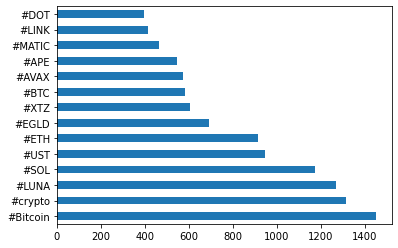

In [4]:
#What are the most commonly used hashtags in crypto from the pre-selected set?
value_counts = tweets["query"].value_counts().plot(kind='barh')
print(value_counts)

# Data cleaning
Before diving into the analysis, we should format the dates of the dataset, based on the tweetdate or timestamp columns, in order to do time series analysis.

**Methods used**: Date format, outliers cleaning

In [5]:
#Format date and see the result on first 10 tweets in the dataset
tweets["tweetDate"] = pd.to_datetime(tweets["tweetDate"])
print(tweets.head(10))

                  tweetDate  \
0 2022-05-11 01:38:14+00:00   
1 2022-04-28 05:51:55+00:00   
2 2022-05-10 16:36:13+00:00   
3 2022-05-11 08:21:35+00:00   
4 2022-05-10 21:32:03+00:00   
5 2022-05-09 14:09:00+00:00   
6 2022-05-10 20:23:56+00:00   
7 2022-05-09 09:56:56+00:00   
8 2022-05-10 00:33:04+00:00   
9 2022-05-09 19:32:42+00:00   

                                             content  \
0  🎉 GIVEAWAY 🎉\n\nWe Partnered Up with @Fightbac...   
1  Elon yapmış yapacağını yine. Favlayınca tesla ...   
2  #BITCOIN ARE YOU READY FOR THE HUGE PUMP ????\...   
3  Same month last year\n\n#btc #cryptocrash #Bit...   
4  Enjoy the dump boys \nWhile am helping @crypto...   
5  Today's lunch.\nThanks #BTC https://t.co/qf1S3...   
6  #BITCOIN THE 4TH GREAT HISTORICAL CYCLE BEGINS...   
7  Bunu kim çizdi bilmiyorum ama bayıldım😂\n\n#Bi...   
8  You need to LEARN rapidly! #BTC\n\nIt's a Conf...   
9  Que dice #Bukele ?? 😁😁 #bitcoin #BTC #cryptotr...   

                       twitterProfile  \


In [6]:
#Sorting tweets per chronological order
data_hour = tweets["tweetDate"].value_counts()
data_hour = data_hour.sort_index()
print(data_hour)

2018-11-25 01:39:01+00:00    1
2021-03-21 00:51:57+00:00    1
2021-11-19 15:57:35+00:00    1
2022-01-05 01:17:00+00:00    1
2022-01-24 00:02:37+00:00    1
                            ..
2022-05-15 01:38:57+00:00    1
2022-05-15 01:41:58+00:00    1
2022-05-15 01:53:15+00:00    1
2022-05-15 02:04:07+00:00    1
2022-05-15 02:09:48+00:00    1
Name: tweetDate, Length: 11120, dtype: int64


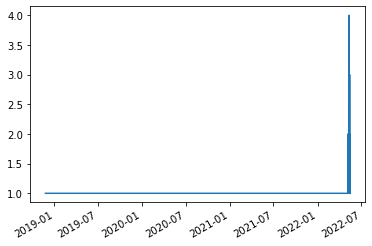

In [7]:
import matplotlib.pyplot as plt
#Plotting the data in a graph
data_hour.plot(kind="line")
plt.show()

By sorting the data by dates in a chronological order, we can see there are clear **outliers** with the first tweet that dates from Nov-2018.

This is what highlights the chart above, most data is centered around the last few weeks, it is therefore irrelevant to keep the outliers from the past. 
We should remove them and focus the analysis on the last few days.

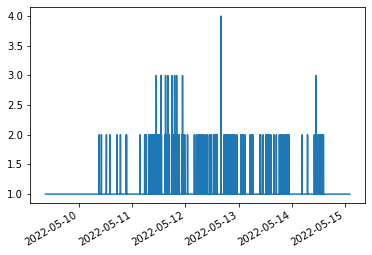

In [8]:
#Narrowing down the period and filtering outliers
data_filter = data_hour.iloc[1000:]
data_filter.plot(kind="line")
plt.show()

In [9]:
#count the number of tweets per date
data_hour = tweets["tweetDate"].dt.date.value_counts()
data_hour = data_hour.sort_index().iloc[30:]
print(data_hour)

2022-05-06     144
2022-05-07     130
2022-05-08     213
2022-05-09     399
2022-05-10     780
2022-05-11    3207
2022-05-12    2697
2022-05-13    2169
2022-05-14    1158
2022-05-15      13
Name: tweetDate, dtype: int64


# Deep Dive Analysis
The objective will be to assess the tweet intensity and community engagement behind each crypto asset and derive potential investment signals

In [10]:
#Regroup the data around dates and hashtags
date = tweets["tweetDate"].dt.date
hashtag = tweets['query']
weekly_data = pd.concat([date, hashtag], axis=1)
weekly_data.columns = ["Date","Hashtag"]
print(weekly_data)

             Date  Hashtag
0      2022-05-11     #BTC
1      2022-04-28     #BTC
2      2022-05-10     #BTC
3      2022-05-11     #BTC
4      2022-05-10     #BTC
...           ...      ...
11336  2022-05-14  #crypto
11337  2022-05-14  #crypto
11338  2022-05-14  #crypto
11339  2022-05-15  #crypto
11340  2022-05-14  #crypto

[11341 rows x 2 columns]


In [11]:
# count the number of tweets per date
hashtag_count = weekly_data["Date"].value_counts()
hashtag_count = hashtag_count.sort_index().iloc[30:]
print(hashtag_count)

2022-05-06     144
2022-05-07     130
2022-05-08     213
2022-05-09     399
2022-05-10     780
2022-05-11    3207
2022-05-12    2697
2022-05-13    2169
2022-05-14    1158
2022-05-15      13
Name: Date, dtype: int64


In [12]:
#Reformat the data to count the #of tweets per hashtag per date
#Display only first 10 results
hashtag_date = weekly_data.groupby(['Hashtag', 'Date']).size()
hashtag_date = hashtag_date.reset_index()
hashtag_date = hashtag_date.rename(columns={0: "#of Occurences"})
print(hashtag_date.head(10))

  Hashtag        Date  #of Occurences
0    #APE  2022-03-26               1
1    #APE  2022-04-30               2
2    #APE  2022-05-01               2
3    #APE  2022-05-02               3
4    #APE  2022-05-03               4
5    #APE  2022-05-04               8
6    #APE  2022-05-05               5
7    #APE  2022-05-06              13
8    #APE  2022-05-07              22
9    #APE  2022-05-08              26


In [13]:
hashtag_date = hashtag_date.groupby(["Hashtag", "Date"]).mean()["#of Occurences"]
print(hashtag_date.head(10))

Hashtag  Date      
#APE     2022-03-26     1
         2022-04-30     2
         2022-05-01     2
         2022-05-02     3
         2022-05-03     4
         2022-05-04     8
         2022-05-05     5
         2022-05-06    13
         2022-05-07    22
         2022-05-08    26
Name: #of Occurences, dtype: int64


In [14]:
#Display all tweets per hashtag on the refined period in a table
hashtag_date = hashtag_date.unstack(level=0).iloc[30:]
print(hashtag_date)

Hashtag      #APE  #AVAX   #BTC  #Bitcoin  #DOT  #EGLD   #ETH  #LINK  #LUNA  \
Date                                                                          
2022-05-06   13.0   35.0    NaN       NaN  13.0   25.0    NaN   11.0    3.0   
2022-05-07   22.0   18.0    NaN       NaN  10.0   25.0    NaN   10.0    NaN   
2022-05-08   26.0   21.0    3.0       1.0  17.0   37.0    1.0   27.0    1.0   
2022-05-09   38.0   40.0    9.0       7.0  17.0   64.0    3.0   28.0    5.0   
2022-05-10   69.0   34.0   40.0      35.0  36.0   79.0   24.0   51.0   24.0   
2022-05-11   98.0   90.0  216.0     514.0  81.0  141.0  291.0  108.0  461.0   
2022-05-12   96.0   85.0  149.0     422.0  82.0  121.0  252.0   48.0  353.0   
2022-05-13  119.0   77.0  114.0     337.0  75.0  122.0  225.0   60.0  257.0   
2022-05-14   38.0   29.0   48.0     131.0  49.0   45.0  117.0   25.0  164.0   
2022-05-15    NaN    NaN    NaN       NaN   NaN    NaN    NaN    NaN    NaN   

Hashtag     #MATIC   #SOL   #UST   #XTZ  #crypto  


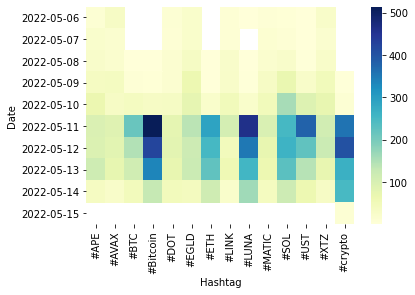

In [15]:
import seaborn as sns
#Plot a heatmap of the data to see the tweet intensity by date and hashtag
sns.heatmap(hashtag_date, cmap="YlGnBu")
plt.show()

***

This chart gives a first sense of the tweet intensity over the period. 

First it appears that there has been a lot happening between the 11th and the 12th in the crypto ecosystem.

The following hashtags are the most used: #Bitcoin, #ETH, #LUNA, #SOL, #UST, #Crypto.

This gives potential indication about the popularity of projects, but also of the news intensity related to the ecosystem and projects

***

To refine the analysis and get an understanding of the **community engagement** behind each cryptocurrency from the set, we will divid the number of tweets by the average Market capitalization of each crypto over the period.


Link to the Market Cap data: https://bit.ly/crypto-MC

This data is from: https://coinmarketcap.com/

In [16]:
#Let's divide the #of tweets by the related cryptocurrency market cap to normalize results
#Market caps are expressed in Billion$
#We get rid of generic hashtags namely Bitcoin and Crypto that would bias our analysis otherwise
hashtag_date['#BTC'] = hashtag_date['#BTC'].div(622.48)
hashtag_date['#ETH'] = hashtag_date['#ETH'].div(285.1)
hashtag_date['#SOL'] = hashtag_date['#SOL'].div(22.2)
hashtag_date['#LUNA'] = hashtag_date['#LUNA'].div(12.77)
hashtag_date['#UST'] = hashtag_date['#UST'].div(12.09)
hashtag_date['#DOT'] = hashtag_date['#DOT'].div(11.95)
hashtag_date['#AVAX'] = hashtag_date['#AVAX'].div(11.57)
hashtag_date['#MATIC'] = hashtag_date['#MATIC'].div(6.79)
hashtag_date['#LINK'] = hashtag_date['#LINK'].div(4.16)
hashtag_date['#APE'] = hashtag_date['#APE'].div(2.94)
hashtag_date['#EGLD'] = hashtag_date['#EGLD'].div(2.3)
hashtag_date['#XTZ'] = hashtag_date['#XTZ'].div(1.93)
hashtag_date = hashtag_date.drop(['#crypto'], axis = 1)
hashtag_date = hashtag_date.drop(['#Bitcoin'], axis = 1)
print(hashtag_date)

Hashtag          #APE     #AVAX      #BTC      #DOT      #EGLD      #ETH  \
Date                                                                       
2022-05-06   4.421769  3.025065       NaN  1.087866  10.869565       NaN   
2022-05-07   7.482993  1.555748       NaN  0.836820  10.869565       NaN   
2022-05-08   8.843537  1.815039  0.004819  1.422594  16.086957  0.003508   
2022-05-09  12.925170  3.457217  0.014458  1.422594  27.826087  0.010523   
2022-05-10  23.469388  2.938634  0.064259  3.012552  34.347826  0.084181   
2022-05-11  33.333333  7.778738  0.346999  6.778243  61.304348  1.020694   
2022-05-12  32.653061  7.346586  0.239365  6.861925  52.608696  0.883900   
2022-05-13  40.476190  6.655143  0.183138  6.276151  53.043478  0.789197   
2022-05-14  12.925170  2.506482  0.077111  4.100418  19.565217  0.410382   
2022-05-15        NaN       NaN       NaN       NaN        NaN       NaN   

Hashtag         #LINK      #LUNA     #MATIC       #SOL       #UST       #XTZ  
Date    

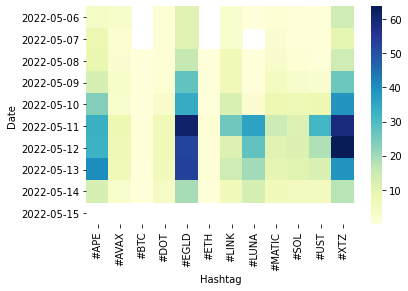

In [17]:
#Plot a heatmap of the Crypto community engagement
sns.heatmap(hashtag_date, cmap="YlGnBu")
plt.show()

***

Results are very interesting as they highlight a very strong community behind notably **#EGLD (Elrond)** and **#XTZ (Tezos)** over the period.

This is relevant to have such insights because as cryptocurrencies are still at a very early stage of their development, the community supporting a project is crucial and can drive returns.

Indeed, this analysis over a longer period could be insightful. It would enable us to see how the interest about a crypto evolves and if fades over time or reinforce.


**Limitation**: This analysis is slighlty biased, as the market cap of top crypto assets such as #BTC (Bitcoin) or #ETH (Ethereum) is too large compared to the #of tweets. The analysis is therefore more relevant for projects with market caps ranging from **1 to 15 Billion dollars**

<AxesSubplot:xlabel='Date'>

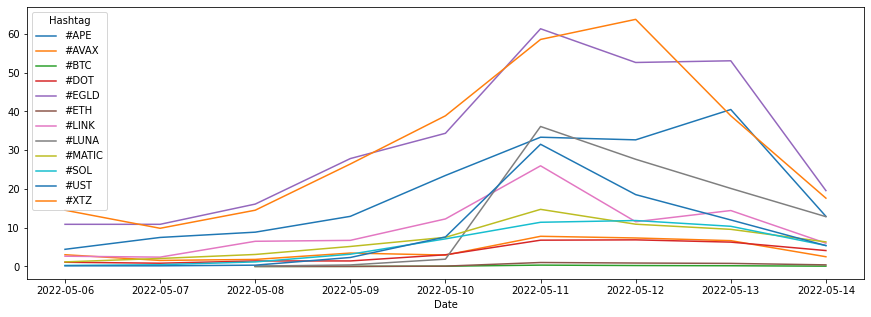

In [18]:
#Let's see if there is a common momentum in terms of tweets over the period
hashtag_date.plot(figsize=(15,5))

***

The chart enhances the trend previously observed. There is an overall increase in tweets intensity between 22/05/10 and 22/05/13.
All crypto-currencies are likely to react to market events either up or down.

Let's see how we can apply it to an investment strategy based on basic signal

In [19]:
#We do the difference of tweets intensity day after day
hashtag_diff = hashtag_date.diff(periods=1,axis=0)
print(hashtag_diff)

Hashtag          #APE     #AVAX      #BTC      #DOT      #EGLD      #ETH  \
Date                                                                       
2022-05-06        NaN       NaN       NaN       NaN        NaN       NaN   
2022-05-07   3.061224 -1.469317       NaN -0.251046   0.000000       NaN   
2022-05-08   1.360544  0.259291       NaN  0.585774   5.217391       NaN   
2022-05-09   4.081633  1.642178  0.009639  0.000000  11.739130  0.007015   
2022-05-10  10.544218 -0.518583  0.049801  1.589958   6.521739  0.073658   
2022-05-11   9.863946  4.840104  0.282740  3.765690  26.956522  0.936514   
2022-05-12  -0.680272 -0.432152 -0.107634  0.083682  -8.695652 -0.136794   
2022-05-13   7.823129 -0.691443 -0.056227 -0.585774   0.434783 -0.094704   
2022-05-14 -27.551020 -4.148660 -0.106028 -2.175732 -33.478261 -0.378814   
2022-05-15        NaN       NaN       NaN       NaN        NaN       NaN   

Hashtag         #LINK      #LUNA    #MATIC      #SOL       #UST       #XTZ  
Date      

In [20]:
#We normalize the data to replace NaN values to 0 and round it
watchlist = hashtag_diff.fillna(0)
watchlist = watchlist.apply(pd.to_numeric)
print(round(watchlist))

Hashtag     #APE  #AVAX  #BTC  #DOT  #EGLD  #ETH  #LINK  #LUNA  #MATIC  #SOL  \
Date                                                                           
2022-05-06   0.0    0.0   0.0   0.0    0.0   0.0    0.0    0.0     0.0   0.0   
2022-05-07   3.0   -1.0   0.0  -0.0    0.0   0.0   -0.0    0.0     1.0   0.0   
2022-05-08   1.0    0.0   0.0   1.0    5.0   0.0    4.0    0.0     1.0   1.0   
2022-05-09   4.0    2.0   0.0   0.0   12.0   0.0    0.0    0.0     2.0   2.0   
2022-05-10  11.0   -1.0   0.0   2.0    7.0   0.0    6.0    1.0     2.0   4.0   
2022-05-11  10.0    5.0   0.0   4.0   27.0   1.0   14.0   34.0     7.0   4.0   
2022-05-12  -1.0   -0.0  -0.0   0.0   -9.0  -0.0  -14.0   -8.0    -4.0   0.0   
2022-05-13   8.0   -1.0  -0.0  -1.0    0.0  -0.0    3.0   -8.0    -1.0  -1.0   
2022-05-14 -28.0   -4.0  -0.0  -2.0  -33.0  -0.0   -8.0   -7.0    -3.0  -5.0   
2022-05-15   0.0    0.0   0.0   0.0    0.0   0.0    0.0    0.0     0.0   0.0   

Hashtag     #UST  #XTZ  
Date          

***
Based on this output we can create a four scale signal that will enable to take trading decisions and benefit from potential arbitrage decisions between cryptocurrencies scoring very high in tweets intensity evolution and those scoring neutral.

**The rationale behind this basic but efficient strategy** *(supposing having enough capital to perform many trades)* **is that crypto assets with high scores will experience larger swings in their prices (either up or down) while crypto assets scoring low scores will not have such significant changes in their prices.**


Therefore, it leaves potential **arbitrage opportunities** between cryptocurrencies.

The scale would be the following: 
- If score >= 3 == **'Very High'**
- If score >= 2 and <3 == **'High'**
- If score >= 1 and <2 == **'Moderate'**
- If score <1 == **'Neutral'**

In [21]:
watchlist_index = watchlist['#APE'].apply(lambda x: 'Very High' if x>=3 else 'High' if x>=2 and x<3 else 'Moderate' if x>=1 and x<2 else 'Neutral')
print(watchlist_index)

Date
2022-05-06      Neutral
2022-05-07    Very High
2022-05-08     Moderate
2022-05-09    Very High
2022-05-10    Very High
2022-05-11    Very High
2022-05-12      Neutral
2022-05-13    Very High
2022-05-14      Neutral
2022-05-15      Neutral
Name: #APE, dtype: object


---



*Cheers, Lucas*